# 趨勢、位階、型態（１）

## 程式實作：利用轉折點與輔助工具判斷多頭、空頭與盤整

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import mplfinance as mpf
import numpy as np

#### 多頭

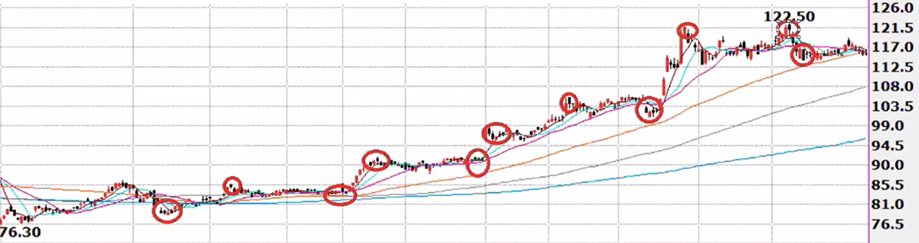

In [2]:
##### 使用2016年9月2日到2017年9月7日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day17(1).xlsx')

# 保存K線的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10']) 

# 將K線的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將K線的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

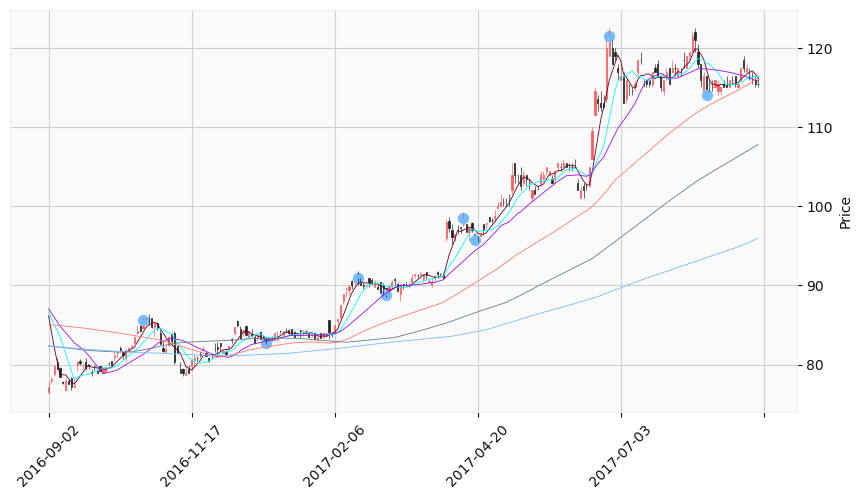

In [3]:
import myutils

# 尋找轉折點
_,_,max_min = myutils.FindingTurningPoints(df_k_line,'close',order=10)

# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線與轉折點    
turning_points_len = len(np.array(df_k_line['Close']))
turning_points = np.array([np.nan]*turning_points_len)
for point in max_min.iterrows() :
    turning_points[point[0]] = point[1]['Price']    
apds = [
    mpf.make_addplot(turning_points,type='scatter',marker='o',markersize=50,color='xkcd:sky blue'),
    mpf.make_addplot(df_sma['SMA5'],width=0.6,color='xkcd:maroon'),
    mpf.make_addplot(df_sma['SMA10'],width=0.6,color='xkcd:cyan'),
    mpf.make_addplot(df_sma['SMA20'],width=0.6,color='xkcd:violet'),
    mpf.make_addplot(df_sma['SMA60'],width=0.6,color='xkcd:salmon'),
    mpf.make_addplot(df_sma['SMA120'],width=0.6,color='xkcd:blue grey'),
    mpf.make_addplot(df_sma['SMA240'],width=0.6,color='xkcd:sky blue')
]

# 繪出K線圖與轉折點，以利人眼判斷
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=apds, datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

In [4]:
# 道氏理論：判斷股票走勢
def dow_theory(high_low_points) :
    high_point = None
    low_point = None
    check_results = []
    for idx in range(0,len(high_low_points)) :
        point = high_low_points.iloc[idx]
        if point['Type'] == 'HI' :
            if high_point is not None :
                x = [high_point.name,point.name]
                y = [high_point['Price'],point['Price']]
                slope,intercept = np.polyfit(x,y,1)
                #print('高點對高點，斜率 ＝ {}'.format(slope))
                if slope > 0 :
                    check_results.append(1)
                elif slope < 0 :
                    check_results.append(-1)
                else :
                    check_results.append(0)
            high_point = point
        elif point['Type'] == 'LO' :
            if low_point is not None :
                x = [low_point.name,point.name]
                y = [low_point['Price'],point['Price']]
                slope,intercept = np.polyfit(x,y,1)
                #print('低點對低點，斜率 ＝ {}'.format(slope))
                if slope > 0 :
                    check_results.append(1)
                elif slope < 0 :
                    check_results.append(-1)
                else :
                    check_results.append(0)
            low_point = point
    identical = (len(set(check_results)) == 1)
    #print('確認結果＝{}，結果是否一致＝{}'.format(check_results,identical))
    if identical is True:
        if check_results[0] == 1 :
            return('上漲')
        elif check_results[0] == -1 :
            return('下跌')
    return('盤整') 

In [5]:
print(dow_theory(max_min))

上漲


#### 空頭

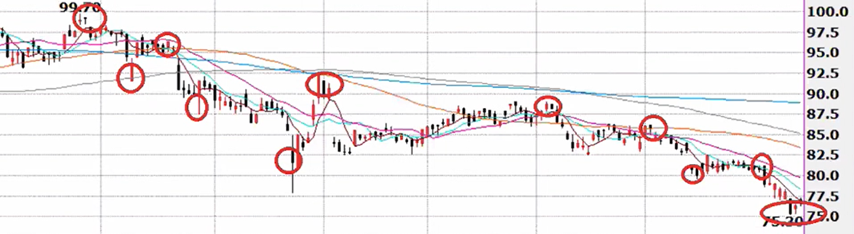

In [6]:
##### 使用2015年6月3日到2016年1月13日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day17(2).xlsx')

# 保存K線的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10']) 

# 將K線的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將K線的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

                Date  Price Type
DateIndex                       
4         2015-06-09   93.2   LO
16        2015-06-26   99.2   HI
56        2015-08-24   81.6   LO
61        2015-08-31   92.5   HI
152       2016-01-11   75.4   LO


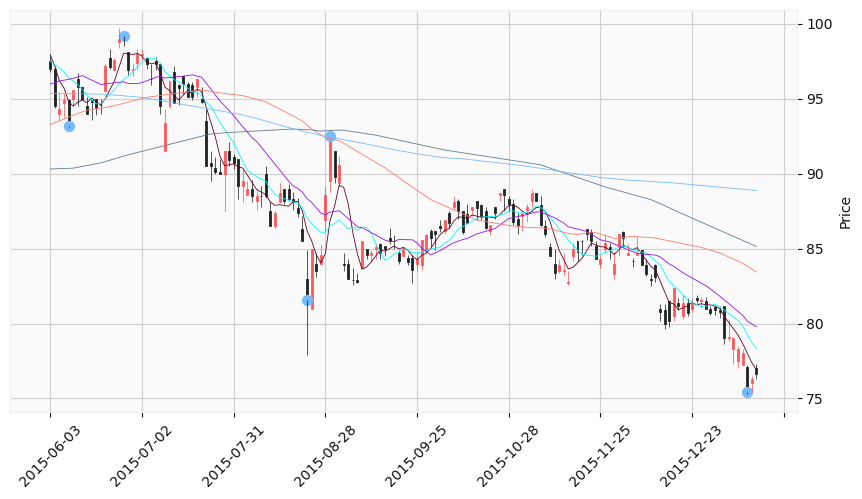

In [7]:
# 尋找轉折點
_,_,max_min = myutils.FindingTurningPoints(df_k_line,'close',order=10)
print(max_min)

# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線與轉折點    
turning_points_len = len(np.array(df_k_line['Close']))
turning_points = np.array([np.nan]*turning_points_len)
for point in max_min.iterrows() :
    turning_points[point[0]] = point[1]['Price']    
apds = [
    mpf.make_addplot(turning_points,type='scatter',marker='o',markersize=50,color='xkcd:sky blue'),
    mpf.make_addplot(df_sma['SMA5'],width=0.6,color='xkcd:maroon'),
    mpf.make_addplot(df_sma['SMA10'],width=0.6,color='xkcd:cyan'),
    mpf.make_addplot(df_sma['SMA20'],width=0.6,color='xkcd:violet'),
    mpf.make_addplot(df_sma['SMA60'],width=0.6,color='xkcd:salmon'),
    mpf.make_addplot(df_sma['SMA120'],width=0.6,color='xkcd:blue grey'),
    mpf.make_addplot(df_sma['SMA240'],width=0.6,color='xkcd:sky blue')
]

# 繪出K線圖與轉折點，以利人眼判斷
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=apds, datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

In [8]:
print(dow_theory(max_min))

下跌


#### 盤整

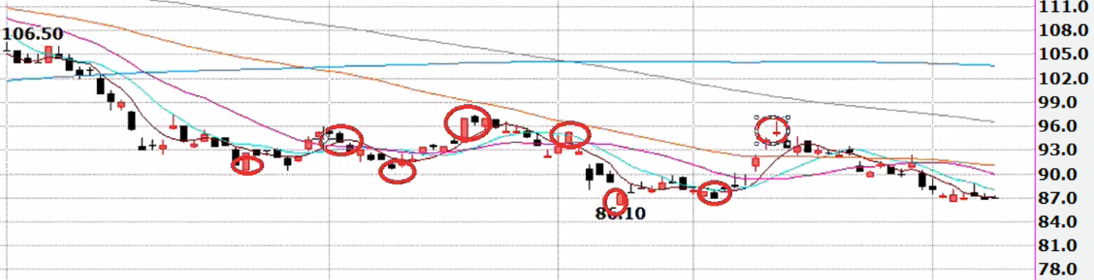

In [9]:
##### 使用2017年11月17日到2018年4月日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day17(3).xlsx')

# 保存K線的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10']) 

# 將K線的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將K線的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

                Date  Price Type
DateIndex                       
4         2017-11-23  106.0   HI
13        2017-12-06   93.0   LO
30        2017-12-29   95.2   HI
68        2018-03-05   87.0   LO
74        2018-03-13   95.2   HI
94        2018-04-12   86.8   LO


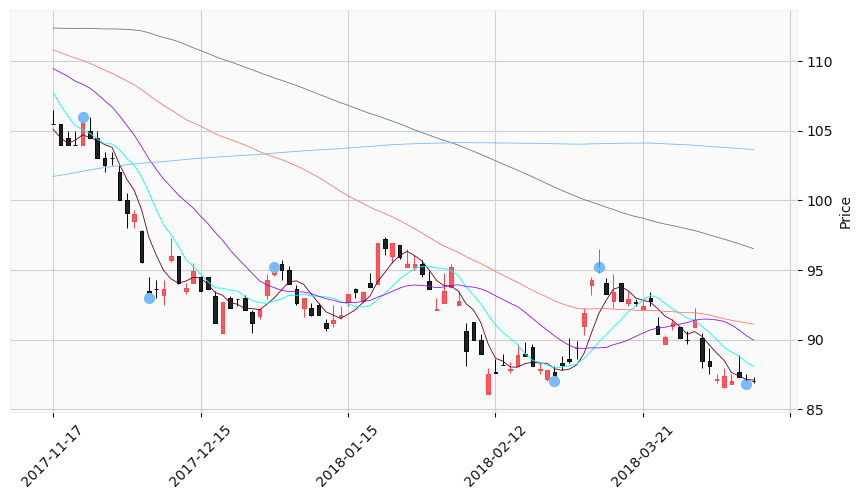

In [10]:
# 尋找轉折點
_,_,max_min = myutils.FindingTurningPoints(df_k_line,'close',order=5)
print(max_min)

# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線與轉折點    
turning_points_len = len(np.array(df_k_line['Close']))
turning_points = np.array([np.nan]*turning_points_len)
for point in max_min.iterrows() :
    turning_points[point[0]] = point[1]['Price']    
apds = [
    mpf.make_addplot(turning_points,type='scatter',marker='o',markersize=50,color='xkcd:sky blue'),
    mpf.make_addplot(df_sma['SMA5'],width=0.6,color='xkcd:maroon'),
    mpf.make_addplot(df_sma['SMA10'],width=0.6,color='xkcd:cyan'),
    mpf.make_addplot(df_sma['SMA20'],width=0.6,color='xkcd:violet'),
    mpf.make_addplot(df_sma['SMA60'],width=0.6,color='xkcd:salmon'),
    mpf.make_addplot(df_sma['SMA120'],width=0.6,color='xkcd:blue grey'),
    mpf.make_addplot(df_sma['SMA240'],width=0.6,color='xkcd:sky blue')
]

# 繪出K線圖與轉折點，以利人眼判斷
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=apds, datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

In [11]:
print(dow_theory(max_min))

盤整
